# Predicting subscription status to a game-related newsletter

## Introduction

A research group in computer science at UBC has collected data about how people play video games. They set up a Minecraft server to log data on how people participate in the game. Minecraft is a sandbox game that allows players to use materials to build structures and equipment to stay safe from the elements. To run their project successfully, the research group needs to focus their recruitment efforts strategically to make sure they have enough resources to handle all the players. We wanted to determine what types of players would be most likely to subscribe to a game-related newsletter, which prompted us to the question: Can player age and number of sessions predict whether or not they are subscribed to the game-related newsletter? To answer this, we used the 2 data sets the research group provided: “players” and “sessions”. 

The “players” data set contains 7 columns:
- Experience level (amateur, beginner, regular, veteran, and pro)
- Subscription status (T/F)
- Players hashed email 
- Played hours (hours)
- Player name
- Player gender
- Player age (years)
  
The “sessions” data set contains 5 columns:
- Players hashed email
- Start time (date and time PST)
- End time (date and time PST) 
- Original start time (milliseconds since epoch)
- Original end time (milliseconds since epoch)



In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)
library(forcats)
library(lubridate)
library(cowplot)
options(repr.matrix.max.rows = 5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
## Reading and wrangling our data

We read the datasets via raw files on Github.

In [3]:
# Read datasets 

players <- read_csv("https://raw.githubusercontent.com/karunaj28/DSCI100-Group-Project/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/karunaj28/DSCI100-Group-Project/refs/heads/main/data/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The columns pertaining to our research question were selected from the players dataset and non-quantitaitive columns were mutated into factor columns.

In [4]:
# selected only the required columns from the players dataset
# converted experience into a numerical variable
# converted subscribe into a numerical variable

players_2 <- players |>
    select(experience, subscribe, hashedEmail, Age) |>
    mutate(experience = as_factor(experience)) |>
    mutate(subscribe = as_factor(subscribe))
players_2

experience,subscribe,hashedEmail,Age
<fct>,<fct>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,17
⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,NA


The columns pertaining to our research question were selected from the sessions dataset.

In [5]:
# selected only the required columns from the sessions dataset

sessions_2 <- sessions |> 
    select(hashedEmail)
sessions_2

hashedEmail
<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686


In [6]:
# Clean NA values from players

players_cleaned <- players_2 |>
  filter(!is.na(experience), !is.na(hashedEmail), !is.na(Age), !is.na(subscribe))

# Clean NA values from sessions

sessions_cleaned <- sessions_2 |> 
    filter(!is.na(hashedEmail))

# checking datasets
head(players_cleaned)
head(sessions_cleaned)

experience,subscribe,hashedEmail,Age
<fct>,<fct>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,17
⋮,⋮,⋮,⋮
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,17


hashedEmail
<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf


In [7]:
# Cumulative number of sessions per player (creating new column called number_of_sessions)
player_sessions <- sessions_cleaned |>
  group_by(hashedEmail) |>
  summarize(number_of_sessions = n(), .groups = "drop")

# Merge players and sessions datasets
players_sessions <- players_cleaned |>
  left_join(player_sessions, by = "hashedEmail") |>
  filter(!is.na(number_of_sessions))  # remove players without sessions

head(players_sessions)

experience,subscribe,hashedEmail,Age,number_of_sessions
<fct>,<fct>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,17,1
⋮,⋮,⋮,⋮,⋮
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,21,1
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,21,1


In [8]:
set.seed(1234)
ps_split <- initial_split(players_sessions, prop = 0.75, strata = subscribe)
ps_train <- training(ps_split)
ps_test <- testing(ps_split)

In [9]:
# Now we begin exploratory data analysis by summarizing the data into different types of tables.
n_per_class <- ps_train |>
    group_by(subscribe) |>
    summarize(n = n())
n_per_class

# the table reports the number of observations in each class (not subscribed (FALSE) or subscribed (TRUE)).
# Using group_by(subscribe), we grouped our table by the Class variable and then applied n() to count the number of observations in each class.
# It is observed that there are more cases of TRUE as compared to FALSE in our training dataset

subscribe,n
<fct>,<int>
FALSE,24
TRUE,68


In [10]:
avg_pred_vals <- ps_train |>
    summarize(total_players = n(),
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_sessions = mean(number_of_sessions, na.rm = TRUE),
    median_sessions = median(number_of_sessions, na.rm = TRUE),
    sd_sessions = sd(number_of_sessions, na.rm = TRUE),
    min_sessions = min(number_of_sessions, na.rm = TRUE),
    max_sessions = max(number_of_sessions, na.rm = TRUE))
avg_pred_vals

total_players,mean_age,median_age,sd_age,min_age,max_age,mean_sessions,median_sessions,sd_sessions,min_sessions,max_sessions
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
92,20.32609,18,6.76466,8,50,12.67391,1,36.23947,1,219


## Visualizations of the training dataset

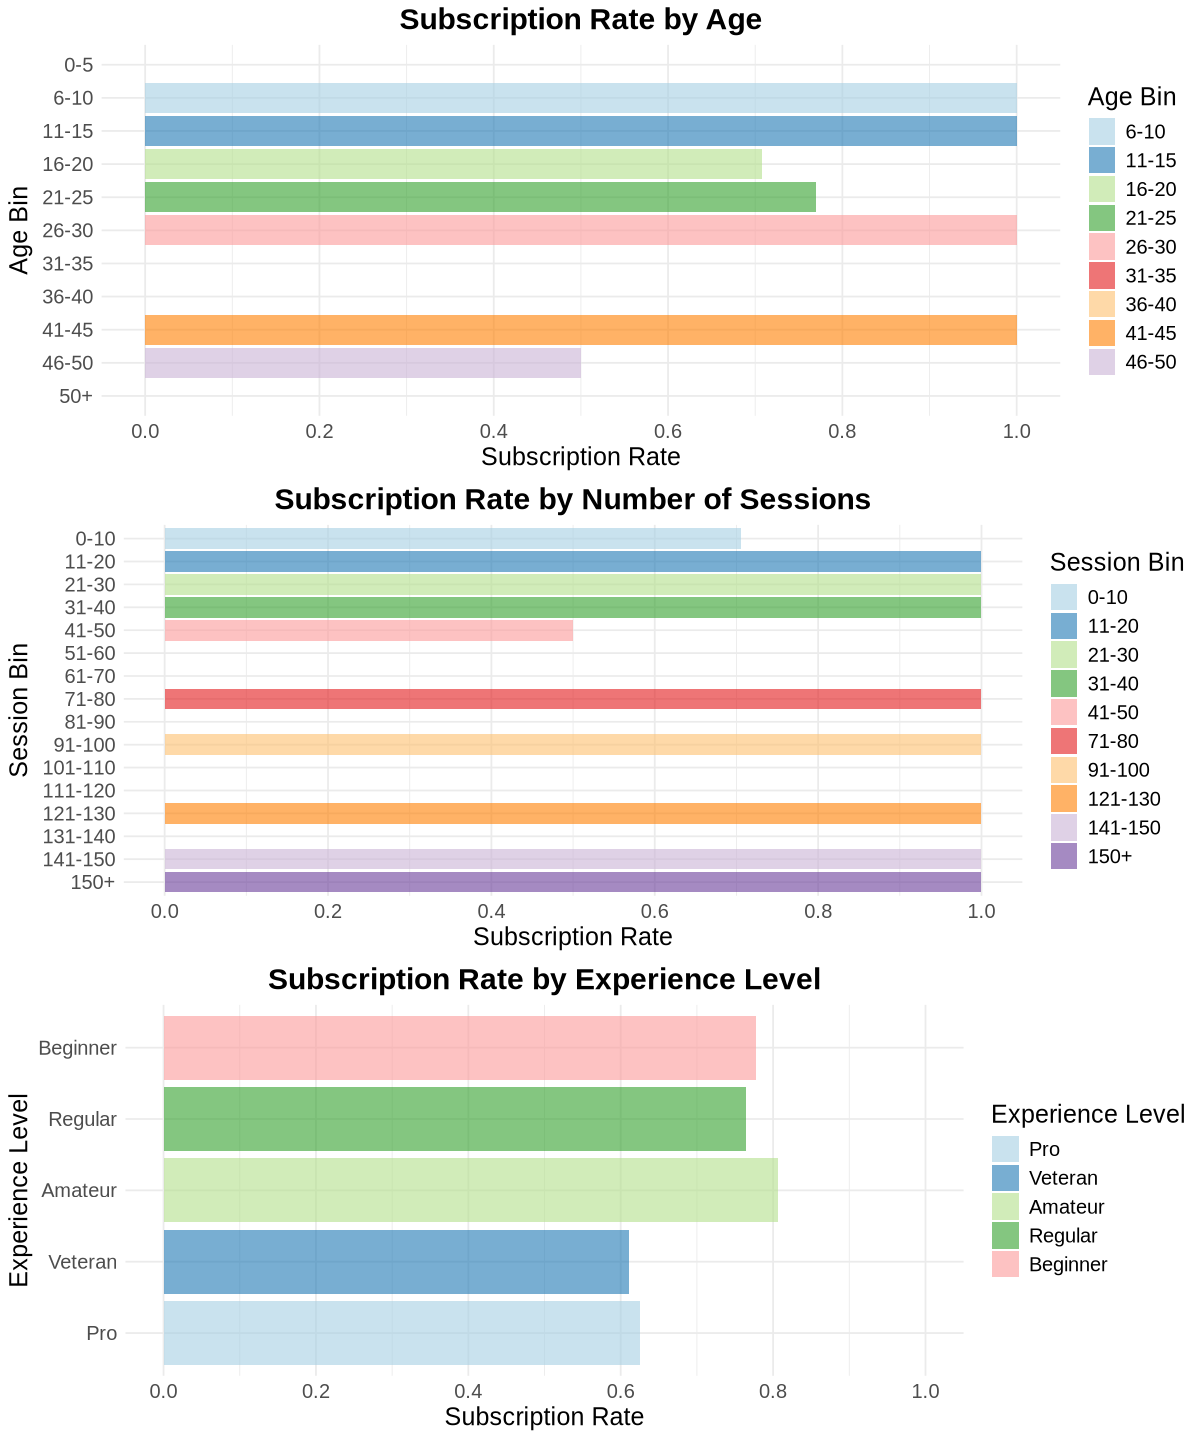

In [24]:
ps_train_age <- ps_train %>%
  mutate(age_bin = cut(Age, 
                       breaks = c(seq(0, 50, by = 5), Inf), 
                       include.lowest = TRUE, 
                       labels = c("0-5", "6-10", "11-15", "16-20", "21-25", 
                                  "26-30", "31-35", "36-40", "41-45", "46-50", "50+")))

subscription_rate_by_age <- ps_train_age %>%
  group_by(age_bin) %>%
  summarise(subscription_rate = mean(subscribe == "TRUE"), .groups = "drop")

barplot_age <- ggplot(subscription_rate_by_age, aes(x = subscription_rate, y = age_bin, fill = age_bin)) +
  geom_bar(stat = "identity", alpha = 0.6) +
  scale_fill_brewer(palette = "Paired", name = "Age Bin") +
  labs(title = "Subscription Rate by Age",
       x = "Subscription Rate",
       y = "Age Bin") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        legend.position = "right", 
        text = element_text(size = 15)) +
  scale_y_discrete(limits = rev(levels(subscription_rate_by_age$age_bin))) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2))



ps_train_sessions <- ps_train %>%
  mutate(session_bin = cut(number_of_sessions, 
                           breaks = c(seq(0, 150, by = 10), Inf), 
                           include.lowest = TRUE, 
                           labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51-60", 
                                      "61-70", "71-80", "81-90", "91-100", "101-110", 
                                      "111-120", "121-130", "131-140", "141-150", "150+")))

subscription_rate_by_sessions <- ps_train_sessions %>%
  group_by(session_bin) %>%
  summarise(subscription_rate = mean(subscribe == "TRUE"), .groups = "drop")

barplot_sessions <- ggplot(subscription_rate_by_sessions, aes(x = subscription_rate, y = session_bin, fill = session_bin)) +
  geom_bar(stat = "identity", alpha = 0.6) +
  scale_fill_brewer(palette = "Paired", name = "Session Bin") +
  labs(title = "Subscription Rate by Number of Sessions",
       x = "Subscription Rate",
       y = "Session Bin") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        legend.position = "right", 
        text = element_text(size = 15)) +
  scale_y_discrete(limits = rev(levels(subscription_rate_by_sessions$session_bin))) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2))

subscription_rates <- ps_train %>%
  group_by(experience) %>%
  summarise(subscription_rate = mean(subscribe == "TRUE"), .groups = "drop")

barplot_experience <- ggplot(subscription_rates, aes(x = subscription_rate, y = experience, fill = experience)) +
  geom_bar(stat = "identity", alpha = 0.6) +
  scale_fill_brewer(palette = "Paired", name = "Experience Level") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Subscription Rate",
       y = "Experience Level") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        legend.position = "right", 
        text = element_text(size = 15)) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2))

options(repr.plot.width = 10, repr.plot.height = 12)
all_plots <- plot_grid(
    barplot_age,
    barplot_sessions,
    barplot_experience,
    ncol = 1)
all_plots

## Selecting our K value

Warning message in geom_point(aes(x = 15, y = ky), size = 4, colour = "blue"):
“All aesthetics have length 1, but the data has 21 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


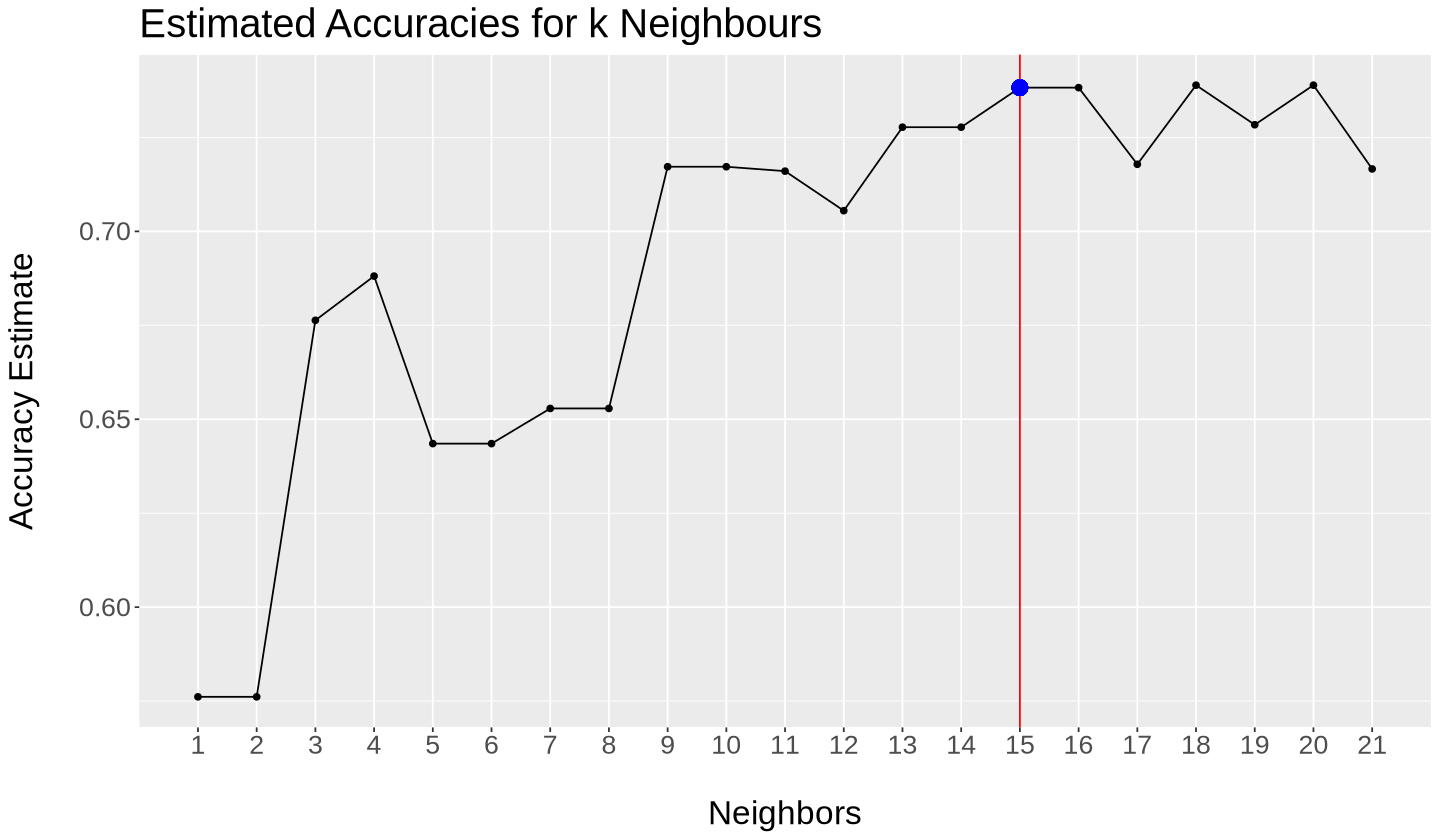

In [11]:
set.seed(1)
ps_recipe <- recipe(subscribe ~ experience + Age + number_of_sessions, data = ps_train) |> 
    step_scale(number_of_sessions, Age) |> 
    step_center(number_of_sessions, Age)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

ps_vfold <- vfold_cv(ps_train, v = 5, strata = subscribe)
gridvals <- tibble(neighbors = seq(1, 21))

ps_results <- workflow() |> 
    add_recipe(ps_recipe) |> 
    add_model(knn_spec) |> 
    tune_grid(resamples = ps_vfold, grid = gridvals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 7)

ky <- ps_results |> filter(neighbors == 15) |> select(mean) |> pull()

cross_val_plot <- ps_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 15, colour = "red") +
    geom_point(aes(x=15, y= ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbors",
         y = "Accuracy Estimate\n",
         title = "Estimated Accuracies for k Neighbours") +
    scale_x_continuous(limits = c(1, 21), breaks = seq(1, 21), minor_breaks = seq(1, 21, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

.metric,.estimate
<chr>,<dbl>
accuracy,0.7096774


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


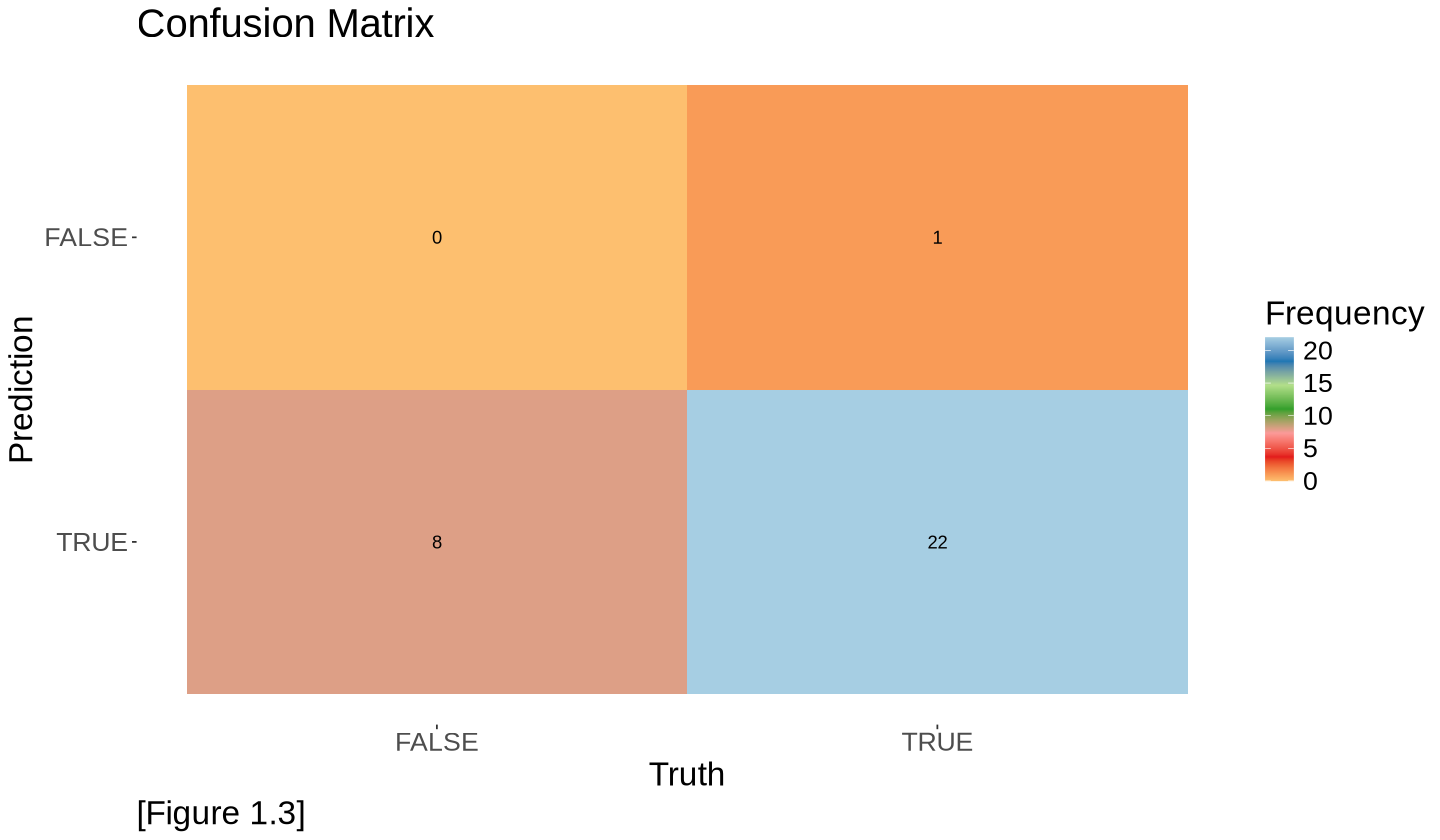

In [12]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
    set_engine("kknn") |>
    set_mode("classification")

ps_fit <- workflow() |>
  add_recipe(ps_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = ps_train)

ps_predictions <- predict(ps_fit, ps_test) |> 
    bind_cols(ps_test)

ps_acc <- ps_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
ps_acc

ps_cm <- ps_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

autoplot(ps_cm, type = "heatmap") +
    scale_fill_distiller(palette = "Paired", name = "Frequency") + #color blind friendly
    labs(title = "Confusion Matrix", caption = "[Figure 1.3]") +
    theme(legend.position = "right", text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))